In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tigro.classes.parser import Parser

from tigro.io.load import load_phmap
from tigro.core.process import filter_phmap
from tigro.utils.util import get_threshold
from tigro.core.process import med_phmap
from tigro.core.fit import fit_ellipse
from tigro.core.process import register_phmap
from tigro.utils.util import get_uref
from tigro.plots.plot import plot_sag
from tigro.core.fit import fit_zernike
from tigro.io.save import to_pickle
from tigro.plots.plot import plot_allpolys
from tigro.plots.plot import plot_polys
from tigro.io.load import from_pickle
from tigro.utils.util import get_diff_idx
from tigro.core.process import zerog_phmap
from tigro.plots.plot import plot_zerog
from tigro.core.process import delta_phmap
from tigro.plots.plot import plot_map

from tigro import logger

In [3]:
config = "/export/NAS/ariel/data/andrea.bocchieri/TIGRO/input/config.ini"
outpath = "/home/ariel/andrea.bocchieri/DATA/Optics/TA/arcetri/tigro_output"
pp = Parser(config, outpath)
logger.setLevel(pp.loglevel)

2024-07-30 13:45:53,179 - tigro - INFO - Initializing parser
2024-07-30 13:45:53,182 - tigro - DEBUG - Config file read
2024-07-30 13:45:53,183 - tigro - DEBUG - General parameters read
2024-07-30 13:45:53,184 - tigro - DEBUG - CGVT parameters read
2024-07-30 13:45:53,185 - tigro - DEBUG - CGVT plots options read
2024-07-30 13:45:53,186 - tigro - DEBUG - Zerog plots options read


In [4]:
pp.__dict__

{'config': '/export/NAS/ariel/data/andrea.bocchieri/TIGRO/input/config.ini',
 'cparser': <configparser.ConfigParser at 0x7fc93c11fd90>,
 'project': 'Template',
 'comment': 'Template for the configuration file',
 'version': '1.0',
 'datapath': '/export/NAS/ariel/data/ariel_user/TA/M1-SM/formatted_data',
 'outpath': '/home/ariel/andrea.bocchieri/DATA/Optics/TA/arcetri/tigro_output',
 '_sequence_ids': '237-238',
 'sequence_ids': array([237, 238]),
 'n_zernike': 15,
 'store_phmap': False,
 'fname_phmap': '/home/ariel/andrea.bocchieri/DATA/Optics/TA/arcetri/tigro_output/tigro.pkl',
 'loglevel': 'DEBUG',
 'run_cgvt': True,
 '_phmap_filter_type': 'mean',
 'phmap_filter_type': <numpy.ma.core._frommethod at 0x7fc8799617b0>,
 'phmap_semi_major': 451,
 'phmap_semi_minor': 310,
 'phmap_seq_ref': 237,
 'plot_regmap': True,
 'plot_regmap_imkey': 237,
 'plot_regmap_no_pttf': True,
 'plot_regmap_no_pttf_imkey': 237,
 'plot_allpolys': True,
 'plot_allpolys_seq_ref': 237,
 '_plot_allpolys_colors': '12r,

### CGVT

In [5]:
logger.info("Running CGVT")

2024-07-30 13:45:53,256 - tigro - INFO - Running CGVT


In [6]:
logger.info("Loading phase maps")
phmap = load_phmap(pp.datapath, pp.sequence_ids)

2024-07-30 13:45:53,289 - tigro - INFO - Loading phase maps
2024-07-30 13:45:53,314 - tigro - DEBUG - Loading files ...
2024-07-30 13:45:53,369 - tigro - DEBUG - 237 010 20240709 237_10_20240709_M1-g ['M1-g']
2024-07-30 13:45:53,384 - tigro - DEBUG - 237 011 20240709 237_11_20240709_M1-g ['M1-g']
2024-07-30 13:45:53,398 - tigro - DEBUG - 237 012 20240709 237_12_20240709_M1-g ['M1-g']


2024-07-30 13:45:53,412 - tigro - DEBUG - 237 013 20240709 237_13_20240709_M1-g ['M1-g']
2024-07-30 13:45:53,425 - tigro - DEBUG - 237 014 20240709 237_14_20240709_M1-g ['M1-g']
2024-07-30 13:45:53,437 - tigro - DEBUG - 237 015 20240709 237_15_20240709_M1-g ['M1-g']
2024-07-30 13:45:53,453 - tigro - DEBUG - 237 016 20240709 237_16_20240709_M1-g ['M1-g']
2024-07-30 13:45:53,467 - tigro - DEBUG - 237 017 20240709 237_17_20240709_M1-g ['M1-g']
2024-07-30 13:45:53,483 - tigro - DEBUG - 237 018 20240709 237_18_20240709_M1-g ['M1-g']
2024-07-30 13:45:53,506 - tigro - DEBUG - 237 019 20240709 237_19_20240709_M1-g ['M1-g']
2024-07-30 13:45:53,521 - tigro - DEBUG - 237 001 20240709 237_1_20240709_M1-g ['M1-g']
2024-07-30 13:45:53,534 - tigro - DEBUG - 237 020 20240709 237_20_20240709_M1-g ['M1-g']
2024-07-30 13:45:53,545 - tigro - DEBUG - 237 021 20240709 237_21_20240709_M1-g ['M1-g']
2024-07-30 13:45:53,557 - tigro - DEBUG - 237 022 20240709 237_22_20240709_M1-g ['M1-g']
2024-07-30 13:45:53,56

In [7]:
phmap[237].keys()

dict_keys(['rawmap', 'number', 'name', 'phi_offs'])

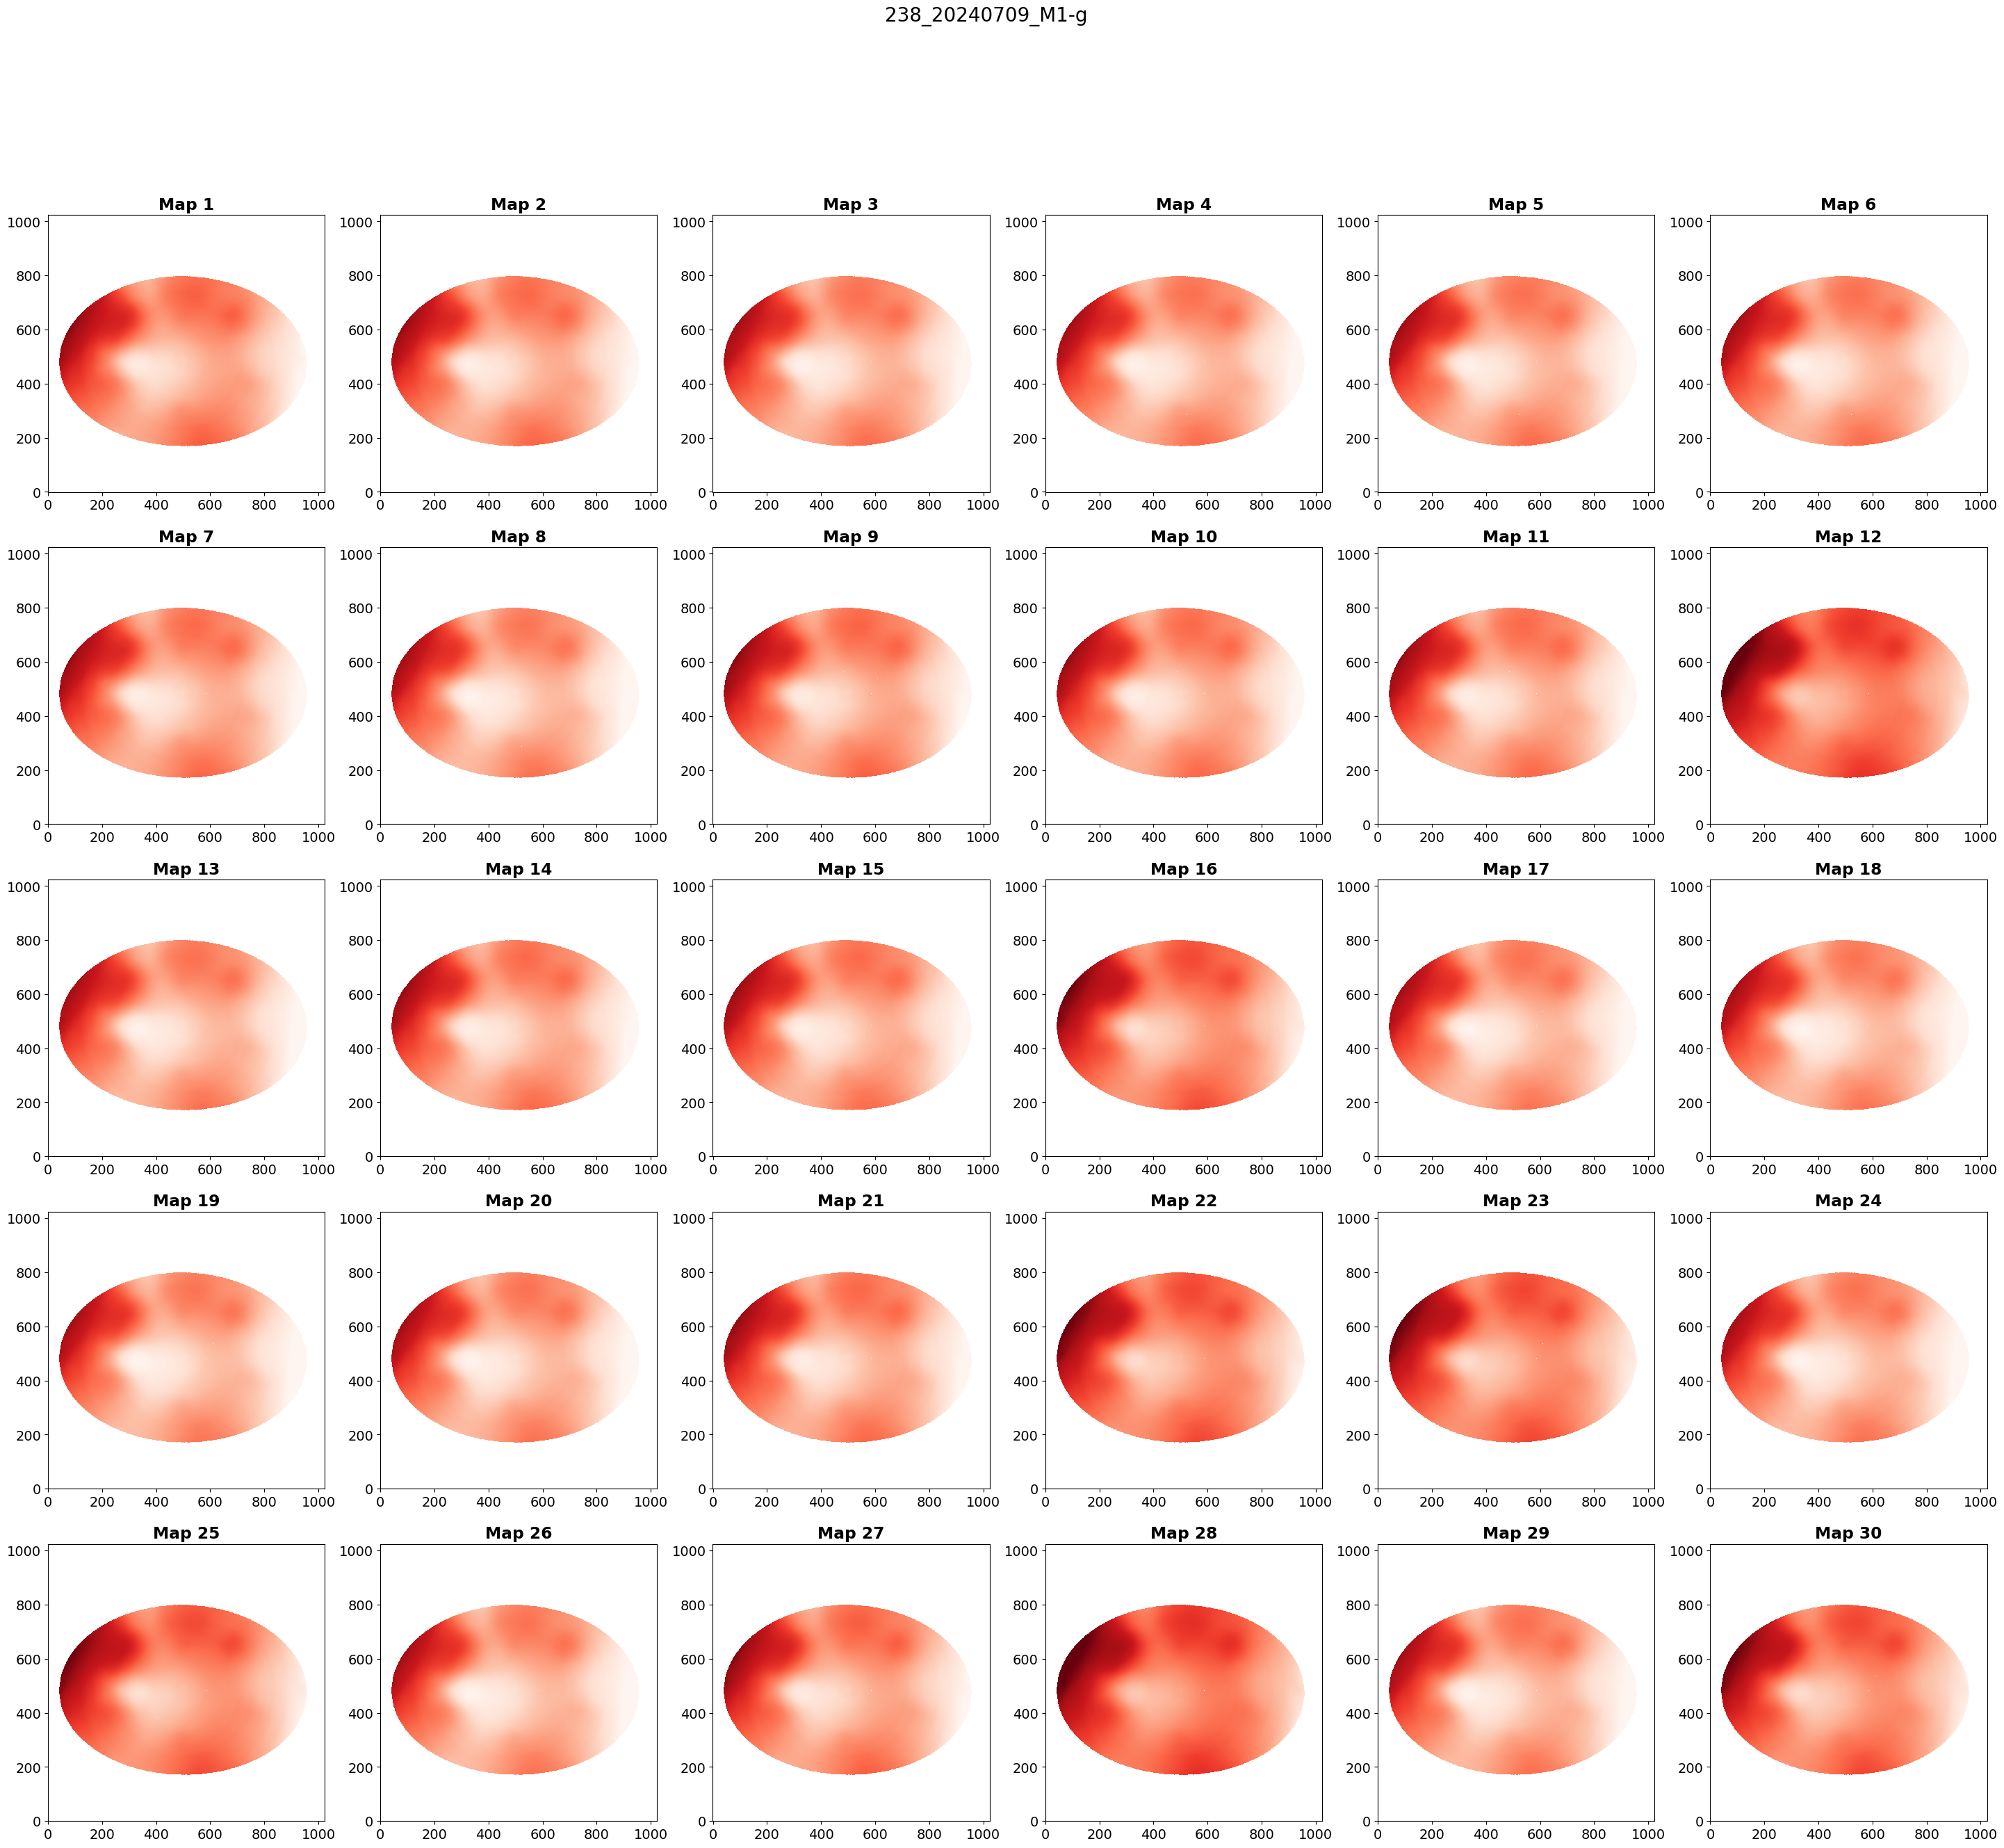

In [9]:
from tigro.plots.plot import plot_sag_quicklook

_ = plot_sag_quicklook(phmap, 238)

In [10]:
logger.info("Filtering phase maps")
phmap = filter_phmap(phmap)

2024-07-30 13:46:11,416 - tigro - INFO - Filtering phase maps
2024-07-30 13:46:11,418 - tigro - DEBUG - Filter sequence...
2024-07-30 13:46:11,419 - tigro - DEBUG - 237


2024-07-30 13:46:16,929 - tigro - DEBUG - 238


2024-07-30 13:46:22,126 - tigro - INFO - Getting threshold for outlier rejection


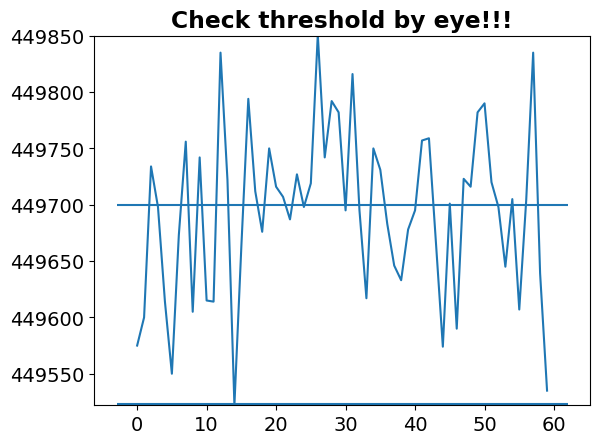

In [11]:
logger.info("Getting threshold for outlier rejection")
threshold = get_threshold(phmap)

In [12]:
logger.info("Computing median map and supermask")
phmap = med_phmap(
    phmap,
    threshold,
    filter_type=pp.phmap_filter_type,
)

2024-07-30 13:46:22,323 - tigro - INFO - Computing median map and supermask


In [13]:
logger.info("Fitting ellipse to phase maps")
phmap = fit_ellipse(phmap)

2024-07-30 13:46:23,046 - tigro - INFO - Fitting ellipse to phase maps
2024-07-30 13:46:23,062 - tigro - DEBUG - 237 (498.3 481.2) 456.8 313.2 -0.8
2024-07-30 13:46:23,078 - tigro - DEBUG - 238 (498.3 481.2) 456.8 313.2 -0.8


In [14]:
logger.info("Registering phase maps")
phmap = register_phmap(phmap)

2024-07-30 13:46:23,105 - tigro - INFO - Registering phase maps


2024-07-30 13:46:23,382 - tigro - DEBUG - || seq:237 | dx: 13.69 dy: 30.78  ||
2024-07-30 13:46:23,646 - tigro - DEBUG - || seq:238 | dx: 13.70 dy: 30.84  ||


In [15]:
logger.info("Getting reference map")
uref = get_uref(
    phmap,
    pp.phmap_semi_major,
    pp.phmap_semi_minor,
    pp.phmap_seq_ref,
)

2024-07-30 13:46:23,672 - tigro - INFO - Getting reference map


2024-07-30 13:46:23,709 - tigro - INFO - Plotting sag of registered phase map


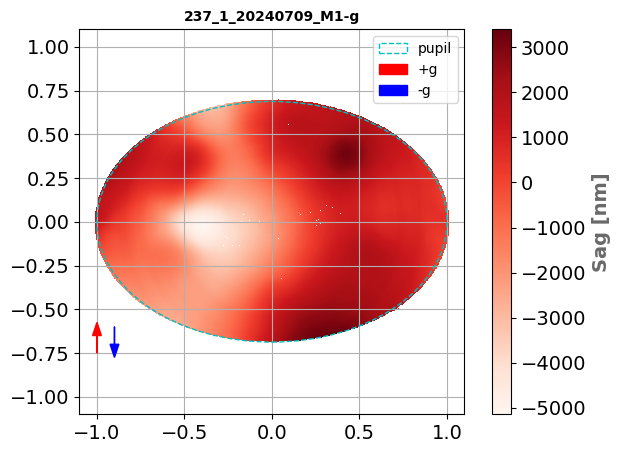

In [16]:
if pp.plot_regmap:
    logger.info("Plotting sag of registered phase map")
    plot_sag(
        phmap,
        uref,
        imkey=pp.plot_regmap_imkey,
        imsubkey="RegMap",
    )

In [14]:
logger.info("Fitting Zernike orthonormal polynomials")
phmap = fit_zernike(
    phmap,
    uref,
    NZernike=pp.n_zernike,
)

2024-07-24 15:12:32,145 - tigro - INFO - Fitting Zernike orthonormal polynomials
2024-07-24 15:12:32,147 - tigro - DEBUG - Calculating 15 Polys... 


2024-07-24 15:12:33,919 - tigro - DEBUG - ... done!
2024-07-24 15:12:33,920 - tigro - DEBUG - Fitting sequence n: ...
2024-07-24 15:12:33,921 - tigro - DEBUG - 237
2024-07-24 15:12:34,207 - tigro - DEBUG - 238
2024-07-24 15:12:34,492 - tigro - DEBUG - 239
2024-07-24 15:12:34,777 - tigro - DEBUG - 240
2024-07-24 15:12:35,066 - tigro - DEBUG - 241
2024-07-24 15:12:35,357 - tigro - DEBUG - 242
2024-07-24 15:12:35,645 - tigro - DEBUG - 243
2024-07-24 15:12:35,934 - tigro - DEBUG - 244
2024-07-24 15:12:36,224 - tigro - DEBUG - 245
2024-07-24 15:12:36,513 - tigro - DEBUG - 246
2024-07-24 15:12:36,803 - tigro - DEBUG - 247
2024-07-24 15:12:37,092 - tigro - DEBUG - 248
2024-07-24 15:12:37,382 - tigro - DEBUG - 261
2024-07-24 15:12:37,671 - tigro - DEBUG - 262
2024-07-24 15:12:37,961 - tigro - DEBUG - 263
2024-07-24 15:12:38,251 - tigro - DEBUG - 264
2024-07-24 15:12:38,540 - tigro - DEBUG - 265
2024-07-24 15:12:38,831 - tigro - DEBUG - 266
2024-07-24 15:12:39,120 - tigro - DEBUG - 267
2024-07-

2024-07-24 15:12:40,889 - tigro - INFO - Plotting sag of registered phase map, minus the Piston, Tip, Tilts and Defocus


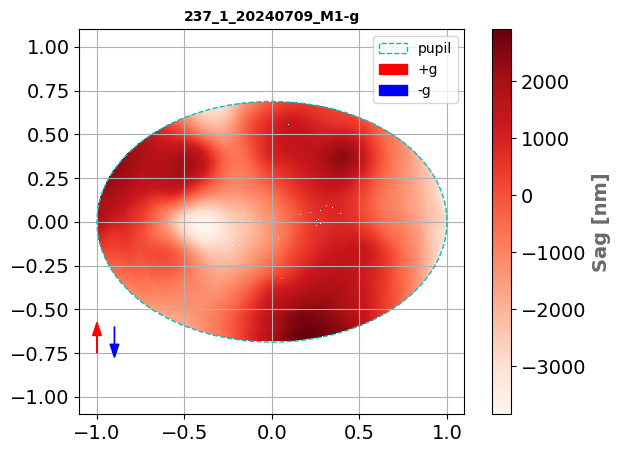

In [15]:
if pp.plot_regmap_no_pttf:
    logger.info(
        "Plotting sag of registered phase map, minus the Piston, Tip, Tilts and Defocus"
    )
    plot_sag(
        phmap,
        uref,
        imkey=pp.plot_regmap_no_pttf_imkey,
        imsubkey="RegMap-PTTF",
    )

In [16]:
if pp.store_phmap:
    logger.info("Saving results to pickle file")
    to_pickle(phmap, pp.outpath)

2024-07-24 15:12:41,215 - tigro - INFO - Plotting all polynomials


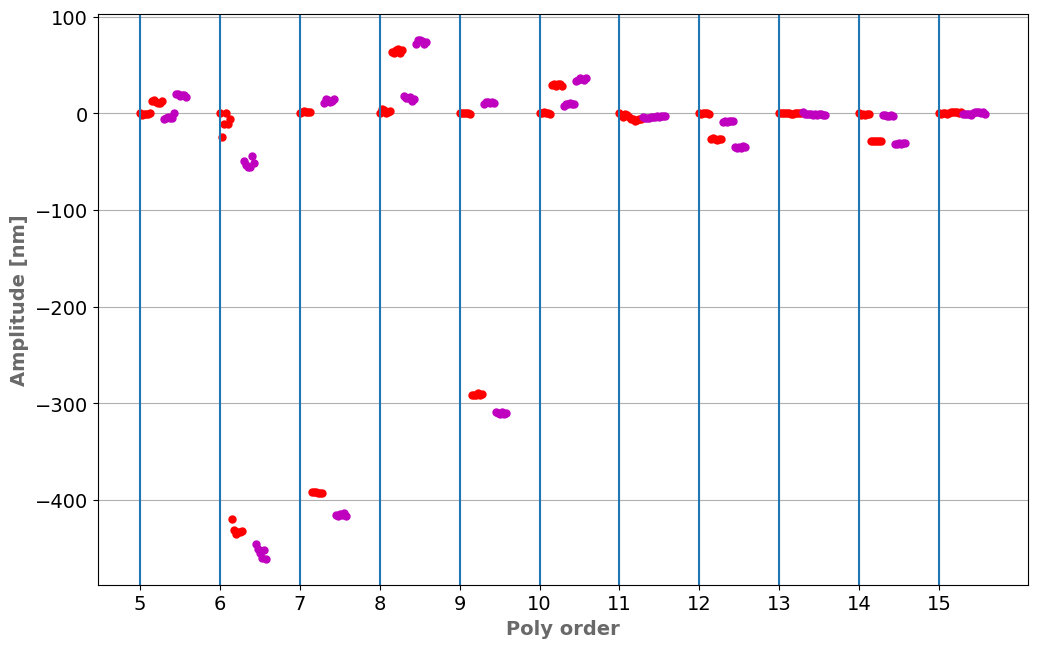

In [17]:
if pp.plot_allpolys:
    logger.info("Plotting all polynomials")
    plot_allpolys(
        phmap,
        sequence_ids=pp.sequence_ids,
        sequence_ref=pp.plot_allpolys_seq_ref,
        NZernike=pp.n_zernike,
        colors=pp.plot_allpolys_colors,
    )

2024-07-24 15:12:41,387 - tigro - INFO - Plotting subset of polynomials vs. sequence


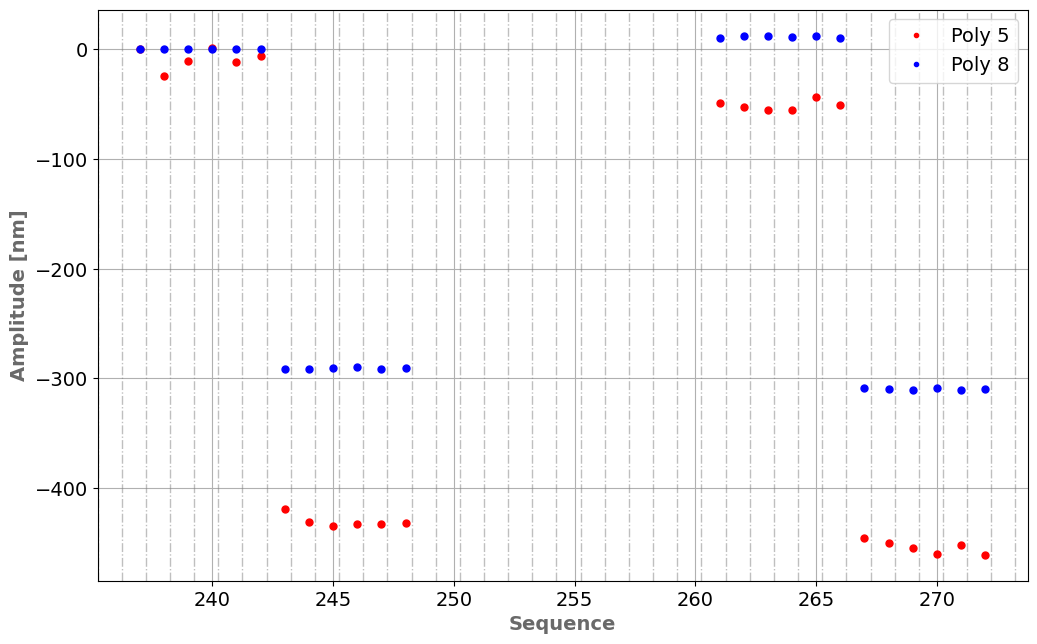

In [18]:
if pp.plot_polys:
    logger.info("Plotting subset of polynomials vs. sequence")
    plot_polys(
        phmap,
        sequence_ids=pp.sequence_ids,
        sequence_ref=pp.plot_polys_seq_ref,
        poly_order=pp.plot_polys_order,
        colors=pp.plot_polys_colors,
    )

### ZEROG

In [19]:
logger.info("Running ZeroG")

2024-07-24 15:12:41,587 - tigro - INFO - Running ZeroG


In [20]:
if not phmap:
    try:
        logger.info("Loading phase maps")
        phmap = from_pickle(pp.outpath)
    except FileNotFoundError:
        logger.error("File not found")

In [21]:
logger.info("Getting diff indices")
diff_idx = get_diff_idx(
    pp.zerog_idx0, pp.zerog_idx1, pp.zerog_colors
)

2024-07-24 15:12:41,642 - tigro - INFO - Getting diff indices


In [22]:
logger.info("ZeroG-ing phase maps")
medmap, zerogmap, coeff_med, cmed, rms, color = zerog_phmap(phmap, diff_idx)

2024-07-24 15:12:41,669 - tigro - INFO - ZeroG-ing phase maps


2024-07-24 15:12:42,668 - tigro - INFO - Plotting ZeroG results


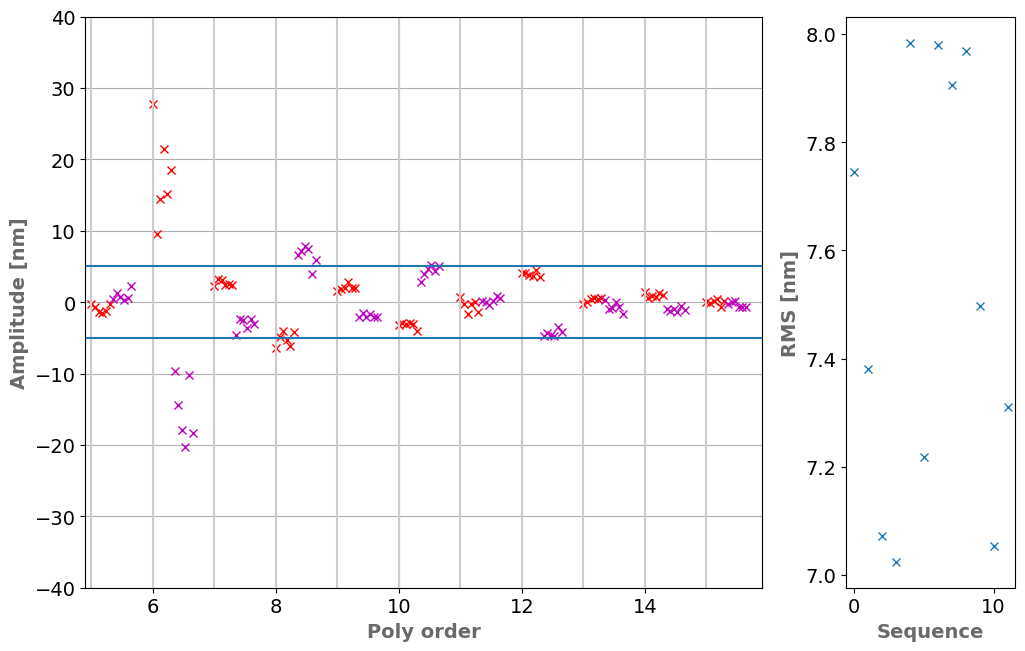

In [23]:
if pp.plot_zerog:
    logger.info("Plotting ZeroG results")
    plot_zerog(
        coeff_med,
        cmed,
        rms,
        color,
        pp.plot_zerog_ylim,
    )

In [24]:
logger.info("Computing delta phase map")
dphmap = delta_phmap(
    zerogmap,
    idx0=pp.dphmap_idx0,
    idx1=pp.dphmap_idx1,
    gain=pp.dphmap_gain,
    filter_type=pp.dphmap_filter_type,
)

2024-07-24 15:12:42,880 - tigro - INFO - Computing delta phase map


2024-07-24 15:12:43,056 - tigro - INFO - Plotting delta phase map


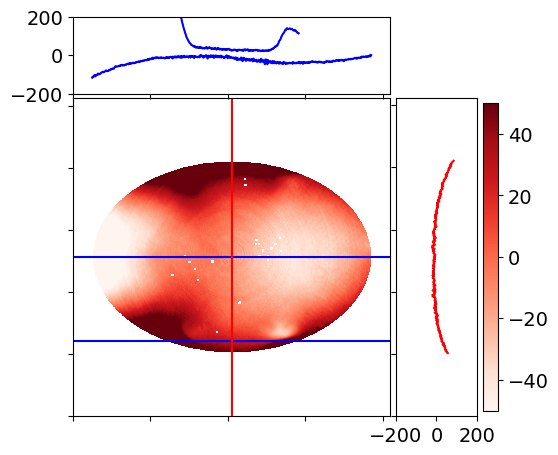

In [25]:
if pp.plot_dphmap:
    logger.info("Plotting delta phase map")

    plot_map(
        dphmap,
        hlines=pp.plot_dphmap_hlines,
        vlines=pp.plot_dphmap_vlines,
        hist_xlim=pp.plot_dphmap_hist_xlim,
        hist_ylim=pp.plot_dphmap_hist_ylim,
    )